importing the dataset

In [ ]:
!pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d janiobachmann/bank-marketing-dataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
100% 142k/142k [00:00<00:00, 608kB/s]
100% 142k/142k [00:00<00:00, 607kB/s]


In [ ]:
!unzip '/content/bank-marketing-dataset.zip'

Archive:  /content/bank-marketing-dataset.zip
  inflating: bank.csv                


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/bank.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
import pandas as pd
#from pd.tools.plotting import scatter_matrix
#scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')

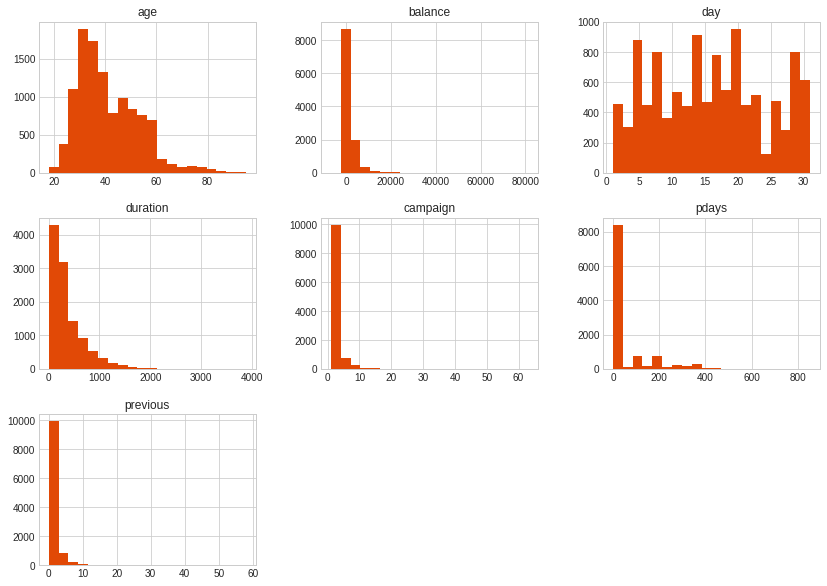

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

df.hist(bins=20, figsize=(14,10), color='#E14906')
plt.show()

<AxesSubplot:xlabel='deposit', ylabel='count'>

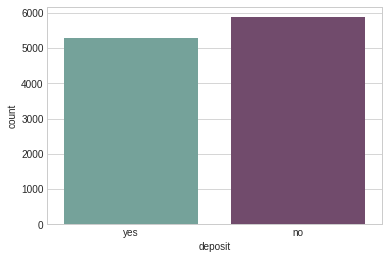

In [ ]:
import seaborn as sns
cols= ["#6daa9f","#774571"]    #to select color for the bars
sns.countplot(x= df["deposit"], palette= cols)

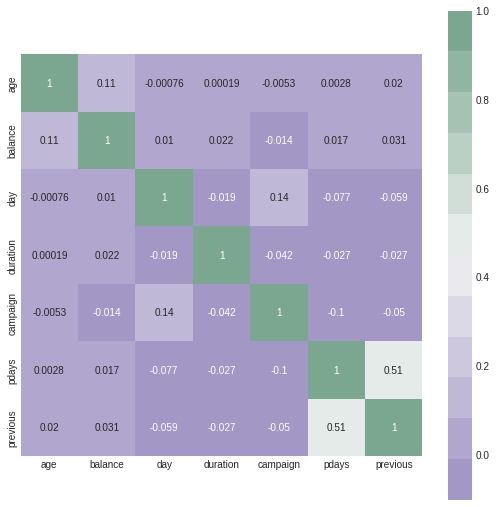

In [ ]:
import matplotlib.pyplot as plt

cmap = sns.diverging_palette(275,150,  s=40, l=65, n=12)
corrmat = df.corr()
plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True);

##previous and pdays have high correlation ...so removing previous column

##categorical data##

* marital: marital status (categorical: 'divorced','married','single','unknown';
note: 'divorced' means divorced or widowed)
* education: (categorical: primary, secondary, tertiary and unknown)
* default: has credit in default? (categorical: 'no','yes','unknown')
* housing: has housing loan? (categorical: 'no','yes','unknown')
* loan: has personal loan? (categorical: 'no','yes','unknown')
* contact: contact communication type (categorical: 'cellular','telephone')
* month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* duration: last contact duration, in seconds (numeric).
 Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
* poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

##numerical data##

1 - **age:** (numeric)

2 -**day**: last contact day of the week

3 - **duration**: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the c

4 - **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)

5 - **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

6 - **previous**: number of contacts performed before this campaign and for this client (numeric)

7- **balance**: Balance of the individual.



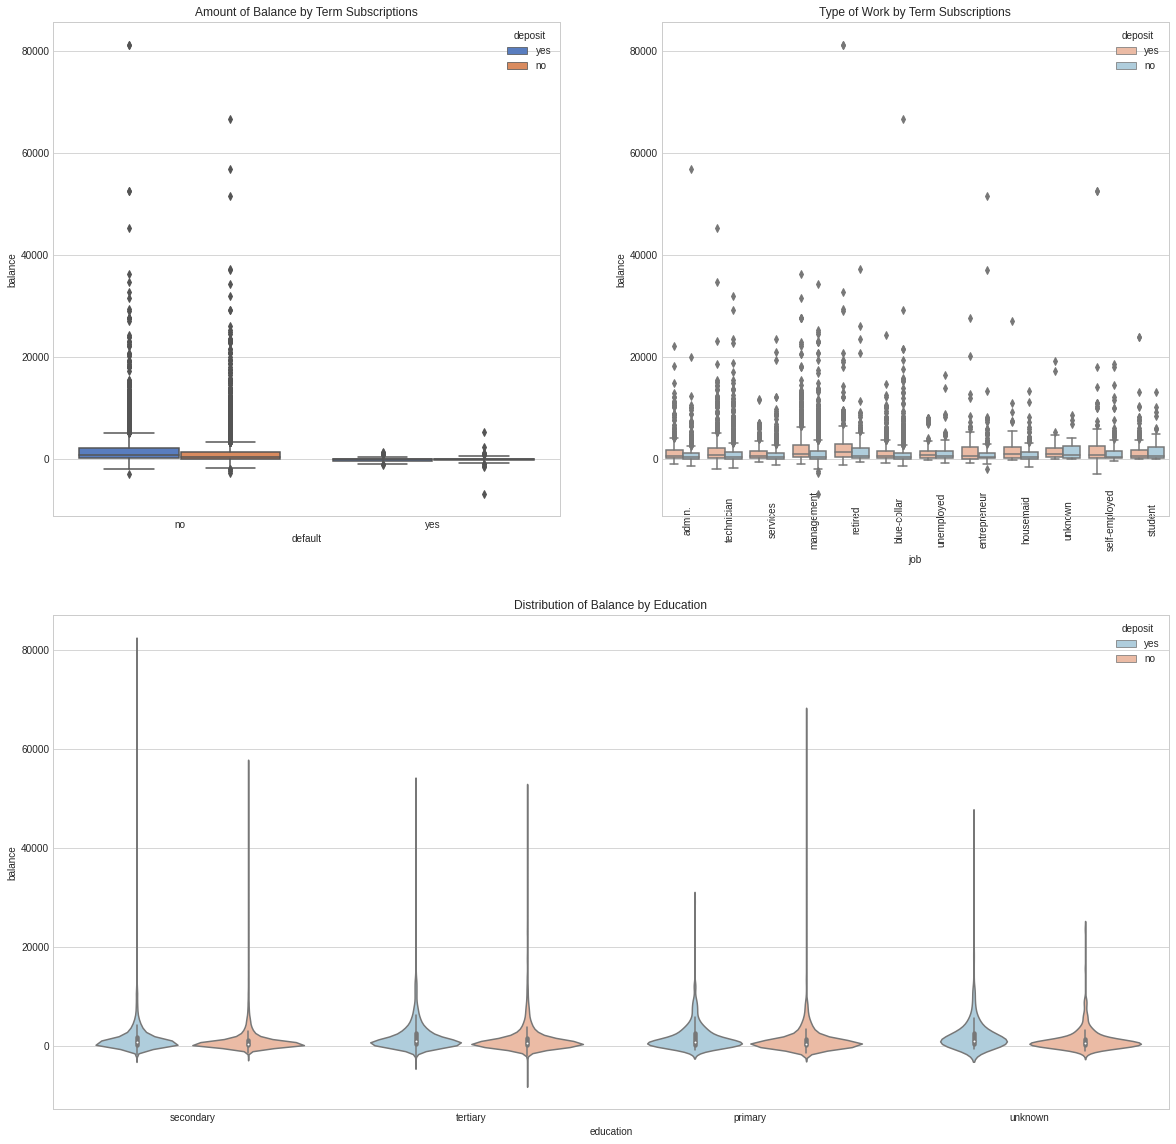

In [ ]:
import seaborn as sns
# plt.style.use('dark_background')
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

g = sns.boxplot(x="default", y="balance", hue="deposit",
                    data=df, palette="muted", ax=ax1)

g.set_title("Amount of Balance by Term Subscriptions")

# ax.set_xticklabels(df["default"].unique(), rotation=45, rotation_mode="anchor")

g1 = sns.boxplot(x="job", y="balance", hue="deposit",
                 data=df, palette="RdBu", ax=ax2)

g1.set_xticklabels(df["job"].unique(), rotation=90, rotation_mode="anchor")
g1.set_title("Type of Work by Term Subscriptions")

g2 = sns.violinplot(data=df, x="education", y="balance", hue="deposit", palette="RdBu_r")

g2.set_title("Distribution of Balance by Education")


plt.show()

In [ ]:
#en = pd.get_dummies(df, columns = ['deposit'])
#df

In [ ]:
df['job'].unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#x_continuous = df[['previous', 'pdays', 'campaign','duration','day','balance', 'age']]
x_continuous = df[['pdays', 'campaign','duration','day','balance', 'age']]
x_continuous

,pdays,campaign,duration,day,balance,age
0,-1,1,1042,5,2343,59
1,-1,1,1467,5,45,56
2,-1,1,1389,5,1270,41
3,-1,1,579,5,2476,55
4,-1,2,673,5,184,54
...,...,...,...,...,...,...
11157,-1,1,257,20,1,33
11158,-1,4,83,16,733,39
11159,-1,2,156,19,29,32
11160,172,2,9,8,0,43


In [ ]:
x_continuous.shape

(11162, 6)

In [ ]:
x_categories = df[['poutcome', 'month', 'contact', 'loan', 'housing', 'default', 'education', 'marital', 'job']]
x_categories

,poutcome,month,contact,loan,housing,default,education,marital,job
0,unknown,may,unknown,no,yes,no,secondary,married,admin.
1,unknown,may,unknown,no,no,no,secondary,married,admin.
2,unknown,may,unknown,no,yes,no,secondary,married,technician
3,unknown,may,unknown,no,yes,no,secondary,married,services
4,unknown,may,unknown,no,no,no,tertiary,married,admin.
...,...,...,...,...,...,...,...,...,...
11157,unknown,apr,cellular,no,yes,no,primary,single,blue-collar
11158,unknown,jun,unknown,no,no,no,secondary,married,services
11159,unknown,aug,cellular,no,no,no,secondary,single,technician
11160,failure,may,cellular,yes,no,no,secondary,married,technician


In [ ]:
#jobx= x_categories['job'].unique()
#jobx

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

In [ ]:
from collections import Counter

def counting(a):
  b = Counter(a)

  ctype = list(b.keys())
#job_type
  number= list(b.values())

  #fig, ax = plt.figure(figsize = (10, 5))
  fig, ax = plt.subplots(figsize =(16, 9))
  # creating the bar plot
  plt.bar(ctype, number, color ='maroon',
          width = 0.1)
  #ax.barh(job_type, number)
  #ax.invert_yaxis()
  plt.xlabel("job type")
  plt.ylabel("No. of customers")
  plt.title("customers in different jobs")
  plt.show()

In [ ]:
from collections import Counter

b = Counter(x_categories['job'])
b

Counter({'admin.': 1334,
         'technician': 1823,
         'services': 923,
         'management': 2566,
         'retired': 778,
         'blue-collar': 1944,
         'unemployed': 357,
         'entrepreneur': 328,
         'housemaid': 274,
         'unknown': 70,
         'self-employed': 405,
         'student': 360})

In [ ]:
b['admin.']

1334

In [ ]:
job_type = list(b.keys())
#job_type
number= list(b.values())
number

[1334, 1823, 923, 2566, 778, 1944, 357, 328, 274, 70, 405, 360]

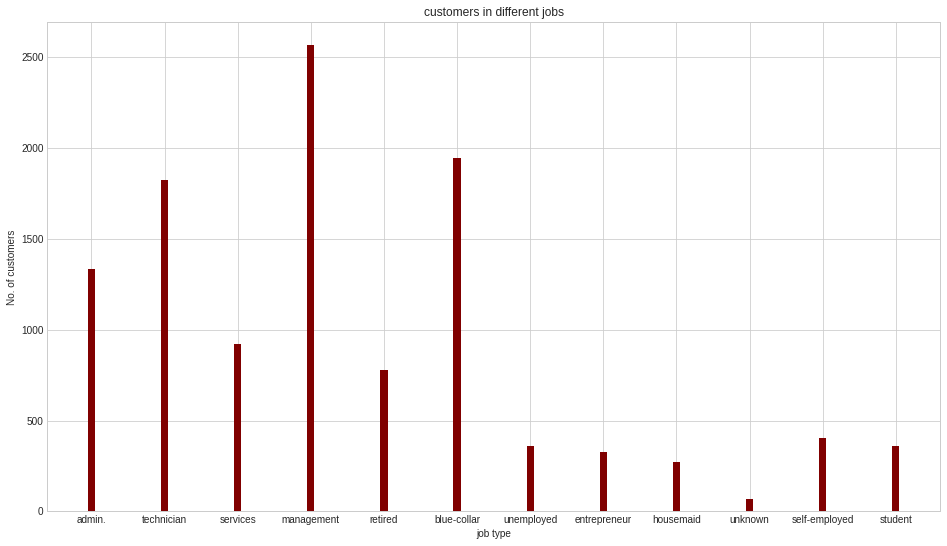

In [ ]:
#fig, ax = plt.figure(figsize = (10, 5))
fig, ax = plt.subplots(figsize =(16, 9))
# creating the bar plot
plt.bar(job_type, number, color ='maroon',
        width = 0.1)
#ax.barh(job_type, number)
#ax.invert_yaxis()
plt.xlabel("job type")
plt.ylabel("No. of customers")
plt.title("customers in different jobs")
plt.show()

clours = https://htmlcolorcodes.com/

<function matplotlib.pyplot.show(close=None, block=None)>

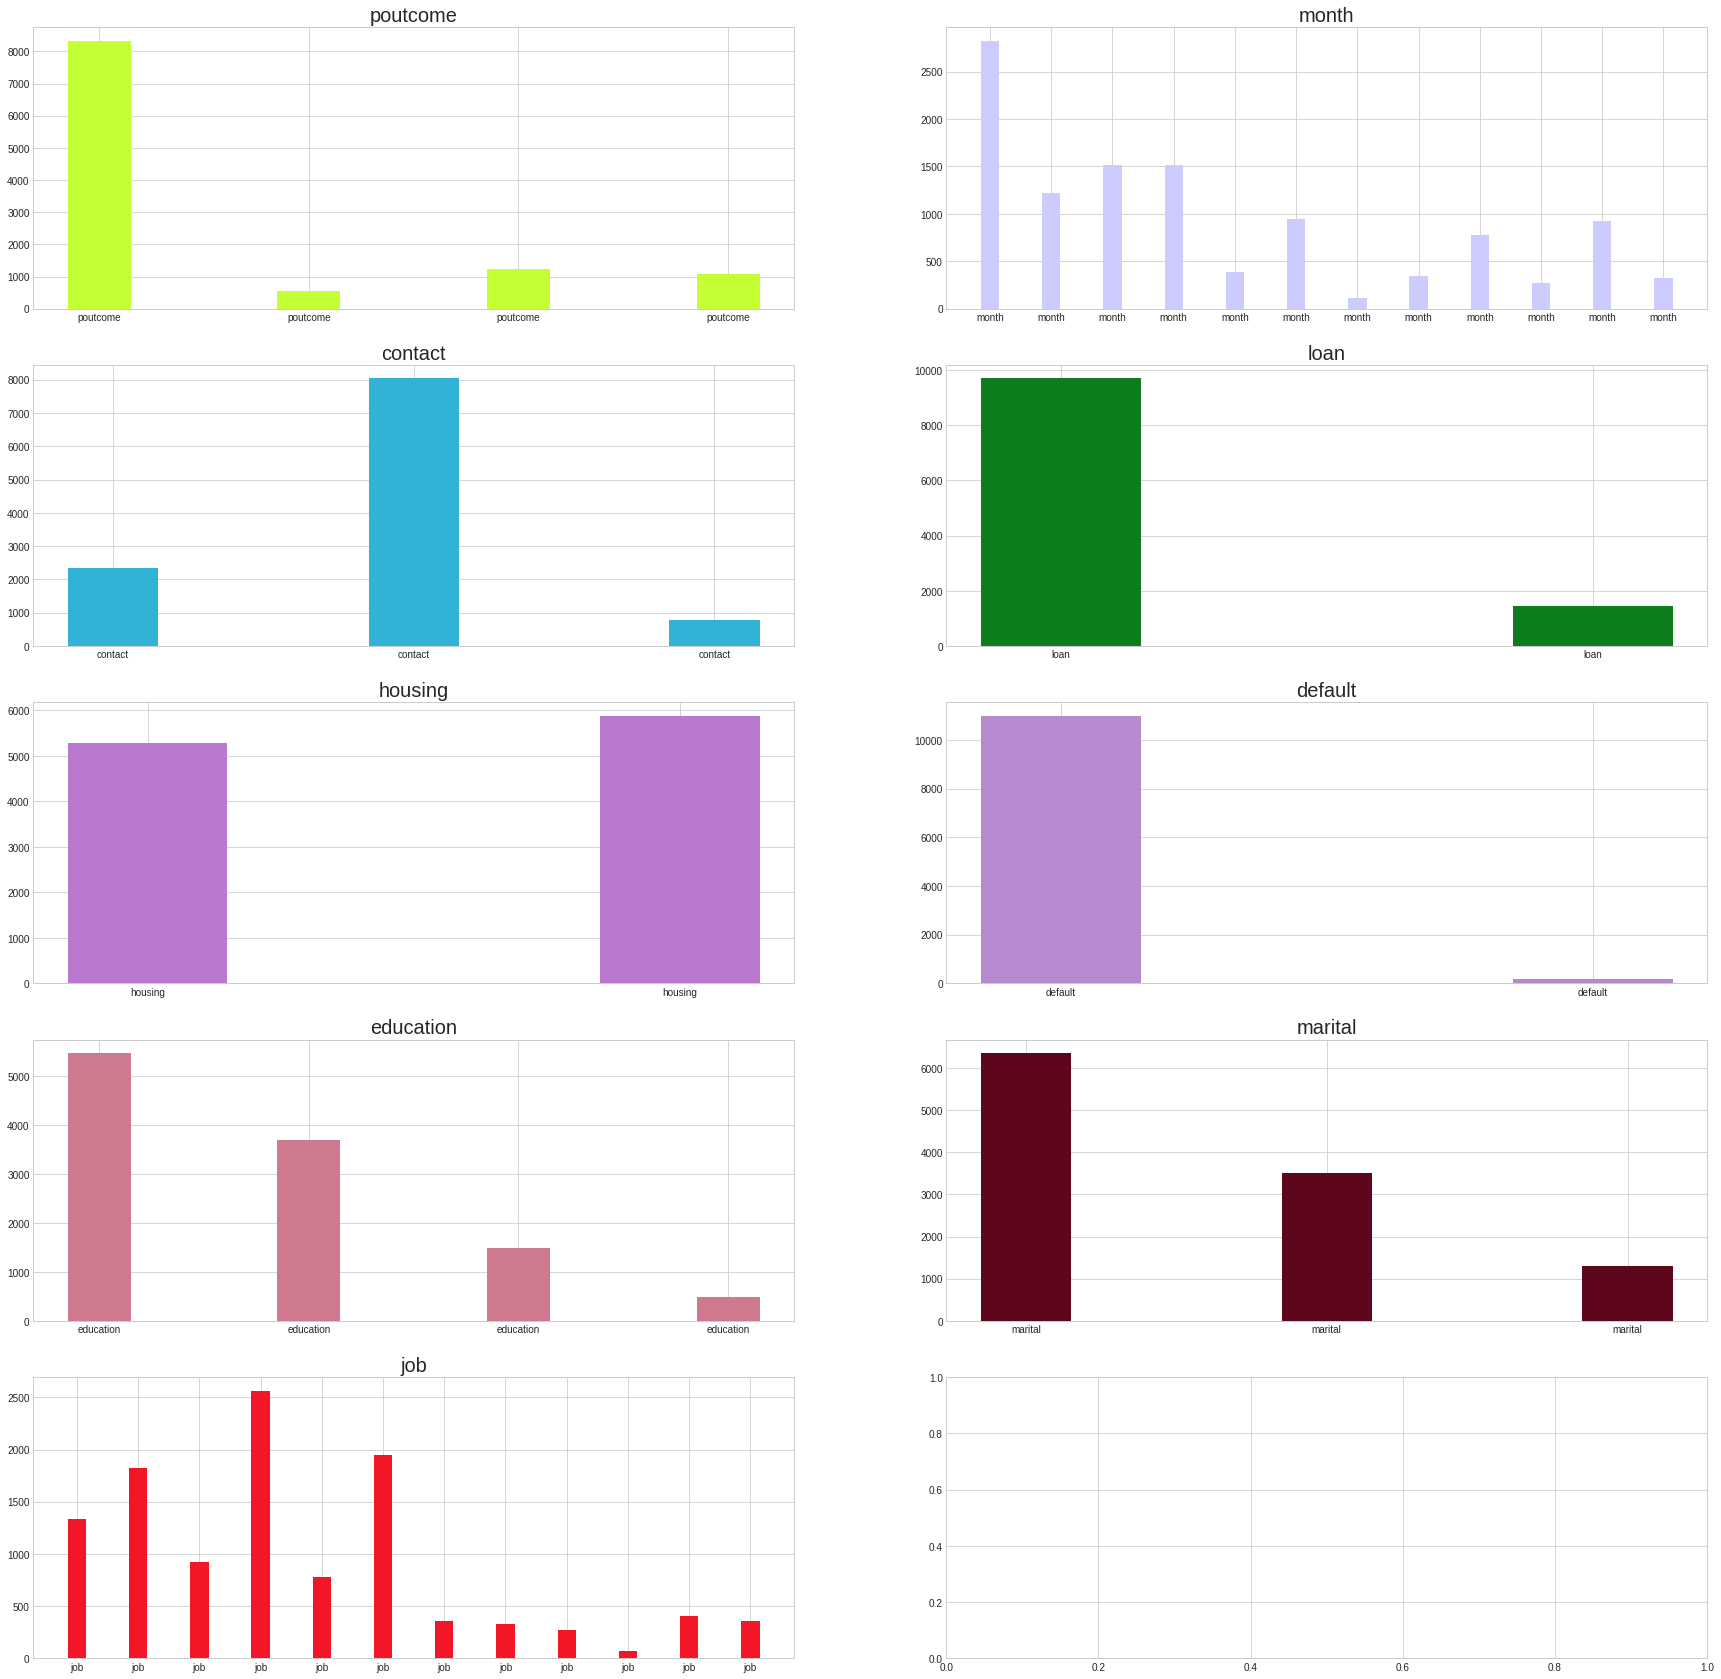

In [ ]:
d = ['poutcome', 'month', 'contact', 'loan', 'housing', 'default', 'education', 'marital', 'job']
colors = ['#C4FF33', '#CCCCFF', '#32B2D7', '#0C7C1C', '#B979CE', '#B789CE', '#CE798E', '#5D061C', '#F31626', '#F3E616']
fig, axs = plt.subplots(5,2 , figsize=(30, 30))
axs = axs.ravel()



for i in range(len(d)):
  b = Counter(x_categories[d[i]])

  ctype = list(b.keys())
#job_type
  number= list(b.values())
  s= d[i]
  axs[i].bar(ctype, number, color=colors[i], width = 0.3, tick_label = str(s))
  axs[i].set_title(d[i], fontsize = 20)

plt.show

In [ ]:
x_categories.shape

(11162, 9)

In [ ]:
onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded = onehot_encoder.fit_transform(x_categories)
onehot_encoded

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [ ]:
x = np.concatenate([x_continuous, onehot_encoded], axis=1)
x

array([[-1.000e+00,  1.000e+00,  1.042e+03, ...,  0.000e+00,  0.000e+00,
         0.000e+00],
       [-1.000e+00,  1.000e+00,  1.467e+03, ...,  0.000e+00,  0.000e+00,
         0.000e+00],
       [-1.000e+00,  1.000e+00,  1.389e+03, ...,  1.000e+00,  0.000e+00,
         0.000e+00],
       ...,
       [-1.000e+00,  2.000e+00,  1.560e+02, ...,  1.000e+00,  0.000e+00,
         0.000e+00],
       [ 1.720e+02,  2.000e+00,  9.000e+00, ...,  1.000e+00,  0.000e+00,
         0.000e+00],
       [-1.000e+00,  1.000e+00,  6.280e+02, ...,  1.000e+00,  0.000e+00,
         0.000e+00]])

In [ ]:
x.shape

(11162, 50)

In [ ]:
x[0]

In [ ]:
### Categorical data to be converted to numeric data
#colors = (['admin.', 'technician', 'services', 'management', 'retired',
#       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
#       'unknown', 'self-employed', 'student'])

### integer mapping using LabelEncoder
#label_encoder = LabelEncoder()
#integer_encoded = label_encoder.fit_transform(colors)
#print(integer_encoded)
#integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)

### One hot encoding
#onehot_encoder = OneHotEncoder(sparse=False)
#onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

#print(onehot_encoded)

In [ ]:
#df['job'] = onehot_encoded

In [ ]:
#df['job'].unique()

In [ ]:
#df

In [ ]:
#df.describe()

In [ ]:
#integer_encoded

In [ ]:
#le = LabelEncoder()


# 2/3. FIT AND TRANSFORM
# use df.apply() to apply le.fit_transform to all columns
#df_2 = df.apply(le.fit_transform)
#df_2.head()

In [ ]:
# TODO: create a OneHotEncoder object, and fit it to all of X

# 1. INSTANTIATE
#enc = OneHotEncoder()

# 2. FIT
#enc.fit(df_2['job'])

# 3. Transform
#onehotlabels = enc.transform(df_2).toarray()
#onehotlabels.shape

# as you can see, you've the same number of rows 891
# but now you've so many more columns due to how we changed all the categorical data into numerical data

In [ ]:
#onehotlabels

In [ ]:
#df_2.head()

In [ ]:
#df_2.describe()

In [ ]:
def one_hot_encoding(colors, st):
  label_encoder = LabelEncoder()
  integer_encoded = label_encoder.fit_transform(colors)
  print(integer_encoded)
  integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)

  ### One hot encoding
  onehot_encoder = OneHotEncoder(sparse=False)
  onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

  df[st] = onehot_encoded
  print(onehot_encoded,df)

In [ ]:
#df

In [ ]:
#df['education'].unique()

In [ ]:

#ohe = pd.get_dummies(data=df, columns=['job'], prefix = ['colum1'])
#print(ohe)

In [ ]:
#df

In [ ]:
x

array([[  0.,  -1.,   1., ...,   0.,   0.,   0.],
       [  0.,  -1.,   1., ...,   0.,   0.,   0.],
       [  0.,  -1.,   1., ...,   1.,   0.,   0.],
       ...,
       [  0.,  -1.,   2., ...,   1.,   0.,   0.],
       [  5., 172.,   2., ...,   1.,   0.,   0.],
       [  0.,  -1.,   1., ...,   1.,   0.,   0.]])

In [ ]:
y_cat = df[['deposit']]
onehot_encoder_y = OneHotEncoder(sparse=False)
y = onehot_encoder.fit_transform(y_cat)
y

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [ ]:
y.shape

(11162, 2)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state=21, shuffle = True)

In [ ]:
x_train.shape

(7813, 50)

In [ ]:
y_train.shape

(7813, 2)

In [ ]:
x_categories

,poutcome,month,contact,loan,housing,default,education,marital,job
0,unknown,may,unknown,no,yes,no,secondary,married,admin.
1,unknown,may,unknown,no,no,no,secondary,married,admin.
2,unknown,may,unknown,no,yes,no,secondary,married,technician
3,unknown,may,unknown,no,yes,no,secondary,married,services
4,unknown,may,unknown,no,no,no,tertiary,married,admin.
...,...,...,...,...,...,...,...,...,...
11157,unknown,apr,cellular,no,yes,no,primary,single,blue-collar
11158,unknown,jun,unknown,no,no,no,secondary,married,services
11159,unknown,aug,cellular,no,no,no,secondary,single,technician
11160,failure,may,cellular,yes,no,no,secondary,married,technician


In [ ]:
pd.DataFrame(x_categories['job'], columns=['job'])

,job
0,admin.
1,admin.
2,technician
3,services
4,admin.
...,...
11157,blue-collar
11158,services
11159,technician
11160,technician


In [ ]:
y_cat

,deposit
0,yes
1,yes
2,yes
3,yes
4,yes
...,...
11157,no
11158,no
11159,no
11160,no


In [ ]:
import scipy.stats as ss

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [ ]:
from itertools import product

d1 = ('poutcome', 'month', 'contact', 'loan', 'housing', 'default', 'education', 'marital', 'job')
d2 = ('poutcome', 'month', 'contact', 'loan', 'housing', 'default', 'education', 'marital', 'job')

cat_var_prod = list(product(d1,d2, repeat = 1))
cat_var_prod

In [ ]:
result = []
for i in cat_var_prod:
  if i[0] != i[1]:
    result.append((i[0],i[1],list(ss.chi2_contingency(pd.crosstab(x_categories[i[0]], x_categories[i[1]])))[1]))
result

In [ ]:
chi_test_output = pd.DataFrame(result, columns = ['var1', 'var2',
                                                       'coeff'])
## Using pivot function to convert the above DataFrame into a crosstab
chi_test_output.pivot(index='var1', columns='var2', values='coeff')

var2,contact,default,education,housing,job,loan,marital,month,poutcome
var1,,,,,,,,,
contact,NaN,8.313834e-06,1.062070e-79,3.498389e-165,7.410439e-145,5.702750e-02,4.935901e-17,0.000000e+00,1.181854e-204
default,8.313834e-06,NaN,3.609312e-01,2.746986e-01,1.118186e-03,1.720481e-15,1.149370e-01,6.822468e-07,2.204021e-07
education,1.062070e-79,3.609312e-01,NaN,1.323257e-45,0.000000e+00,5.471278e-21,1.830554e-72,6.234796e-56,1.015279e-13
housing,3.498389e-165,2.746986e-01,1.323257e-45,NaN,1.111623e-223,6.388908e-16,2.079095e-05,0.000000e+00,1.622675e-57
job,7.410439e-145,1.118186e-03,0.000000e+00,1.111623e-223,NaN,1.022322e-39,7.350992e-252,4.863150e-215,5.643094e-37
loan,5.702750e-02,1.720481e-15,5.471278e-21,6.388908e-16,1.022322e-39,NaN,2.442968e-11,1.483442e-72,3.030505e-17
marital,4.935901e-17,1.149370e-01,1.830554e-72,2.079095e-05,7.350992e-252,2.442968e-11,NaN,7.668761e-14,1.666113e-05
month,0.000000e+00,6.822468e-07,6.234796e-56,0.000000e+00,4.863150e-215,1.483442e-72,7.668761e-14,NaN,2.661987e-226
poutcome,1.181854e-204,2.204021e-07,1.015279e-13,1.622675e-57,5.643094e-37,3.030505e-17,1.666113e-05,2.661987e-226,NaN


In [ ]:
from sklearn.neural_network import MLPClassifier
# Create a neural network classifier
clf = MLPClassifier(hidden_layer_sizes=(32,64,32,64), max_iter=100, batch_size= 32, random_state=21)

# Train the classifier
hist = clf.fit(x_train, y_train)

# Evaluate the classifier
score = clf.score(x_test, y_test)
print("test Accuracy:", score)

score2 = clf.score(x_train, y_train)
print("train Accuracy:", score2)

test Accuracy: 0.8091967751567632
train Accuracy: 0.8393702803020606


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


hidden=32,64,32,64, 100 iter, 32 bs,...82.9%

Loss history: [2.7081427119265955, 1.7003584228669162, 1.5217672198570673, 1.4392761987601637, 1.2860863802539588, 1.391843259374645, 1.0588408579594213, 1.1120985213977914, 1.0597856258446847, 1.0486332790808226, 1.0757505435007075, 0.9486076475207158, 0.969229061671387, 0.9164282549212998, 0.9534174716827739, 0.9502708808376582, 0.9449901529686133, 0.9439538125867606, 0.9152268588870329, 0.9003611660677078, 0.901842478645333, 0.8989441546101479, 0.8740999801568402, 0.9571700068845646, 0.8830484918559356, 0.8701255534944238, 0.8432808974698555, 0.8522905993415604, 0.8586768993575637, 0.8379618765044511, 0.8928307360197264, 0.8197878880536649, 0.8183699306106395, 0.8454897676436324, 0.8207420977434475, 0.8095291737146976, 0.81517641853283, 0.8124288568735304, 0.8062120804872536, 0.8158980472041782, 0.8211513726785048, 0.8069117393576573, 0.8111500280304618, 0.8147643501538062, 0.7862954943452914, 0.7807450264779136, 0.7761534197506819, 0.8070698817422113, 0.7819999826058474, 0.78271718

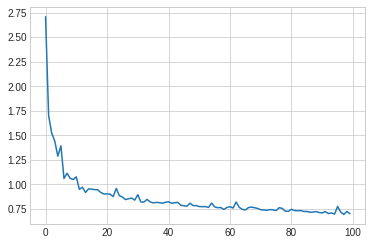

In [ ]:
loss_history = clf.loss_curve_

# Print the loss history
print("Loss history:", loss_history)
import matplotlib.pyplot as plt

plt.figure;
plt.plot(loss_history)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred = clf.predict(x_test)
y_pred

array([[0, 1],
       [0, 1],
       [1, 0],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]])

In [ ]:
y_pred[0][0]

0

In [ ]:
y_pred2=[]
for i in range(3349):
  if y_pred[i][0] == 0:
    y_pred2.append('yes')
  else:
    y_pred2.append('no')
#y_pred2

In [ ]:
y_test[0][1]

0.0

In [ ]:
y_test2=[]
for i in range(3349):
  if y_test[i][0] == 0.0:
    y_test2.append('yes')
  else:
    y_test2.append('no')
#y_test2

In [ ]:
y_pred = clf.predict(x_test)

# Generate confusion matrix
cm = confusion_matrix(y_test2, y_pred2)

# Print confusion matrix
print("Confusion matrix:")
print(cm)

Confusion matrix:
[[1318  429]
 [ 187 1415]]


In [ ]:
y_test

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [ ]:
from sklearn.decomposition import PCA

# create the PCA object and set the number of components to retain
pca = PCA(n_components=12)

# fit the PCA object to the dataset and transform the data
X_pca = pca.fit_transform(x_train)

# print the explained variance ratio for each component
print(pca.explained_variance_ratio_)


In [ ]:
from sklearn.decomposition import PCA

# create the PCA object and set the number of components to retain
pca = PCA(n_components=12)

# fit the PCA object to the dataset and transform the data
X_pcatest = pca.fit_transform(x_test)

# print the explained variance ratio for each component
print(pca.explained_variance_ratio_)

In [ ]:
from sklearn.neural_network import MLPClassifier
# Create a neural network classifier
clf = MLPClassifier(hidden_layer_sizes=(32,64,32,64), max_iter=100, batch_size= 32, random_state=21)

# Train the classifier
hist = clf.fit(X_pca, y_train)

# Evaluate the classifier
score = clf.score(X_pcatest, y_test)
print("Accuracy:", score)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np



# define a range of values for n_estimators
estimators = np.arange(10, 201, 10)

# perform 5-fold cross-validation for each value of n_estimators
scores = []
for n in estimators:
    model = RandomForestClassifier(n_estimators=n)
    score = cross_val_score(model, x_train, y_train, cv=5)
    scores.append(score.mean())

# find the index of the maximum score
best_index = np.argmax(scores)

# get the optimal value of n_estimators
best_n = estimators[best_index]

print('Optimal number of estimators:', best_n)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier(n_estimators=200, random_state=47)

# Fit the random forest classifier to the training data
rfc.fit(x_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = rfc.predict(x_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8527918781725888
